# Le réseau de neurones le plus simple avec TensorFlow

In [174]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

In [175]:
# Parameters (y = a*x + b)
a=0.6
b=2

# Create noisy data
x_data = np.linspace(-10, 10, num=100000)
y_data = a * x_data + b + np.random.normal(size=100000)

# Create the model 
model = keras.Sequential()
model.add(keras.layers.Dense(units = 1, activation = 'linear', input_shape=[1]))
model.compile(loss='mse', optimizer="adam")
# Display the model (only 2 parameters to optimize)
model.summary()

Model: "sequential_219"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_861 (Dense)            (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [176]:
# Learn
model.fit( x_data, y_data, epochs=5, verbose=1 )

Epoch 1/5
3125/3125 [==============================] - 16s 5ms/step - loss: 29.6519
Epoch 2/5
3125/3125 [==============================] - 15s 5ms/step - loss: 1.0025
Epoch 3/5
3125/3125 [==============================] - 16s 5ms/step - loss: 0.9967
Epoch 4/5
3125/3125 [==============================] - 18s 6ms/step - loss: 0.9998
Epoch 5/5
3125/3125 [==============================] - 24s 8ms/step - loss: 1.0069


In [177]:
# Predict (compute) the output 
y_predicted = model.predict(x_data)

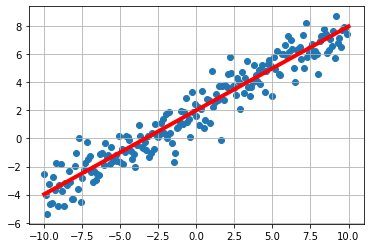

In [178]:
# Display the result
plt.scatter(x_data[::500], y_data[::500])
plt.plot(x_data, y_predicted, 'r', linewidth=4)
plt.grid()
plt.show()

In [179]:
#affichons les valeurs des poids du réseau 
print( model.trainable_variables )

[<tf.Variable 'dense_861/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[0.59800184]], dtype=float32)>, <tf.Variable 'dense_861/bias:0' shape=(1,) dtype=float32, numpy=array([2.0049493], dtype=float32)>]


# Calculer MSE ( l'erreur quadratique moyenne) avec sklearn

In [180]:
from sklearn.metrics import mean_squared_error

print('mse (sklearn): ', mean_squared_error(y_data, y_predicted))

mse (sklearn):  1.0015775178638269


# Régression non linéaire avec un réseau de neurones

In [298]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import math

In [299]:
# Create noisy data
x_data = np.linspace(-10, 10, num=1000)
y_data = 0.1*x_data*np.cos(x_data) + 0.1*np.random.normal(size=1000)
print('Data created successfully')

Data created successfully


In [300]:
# Create the model 
model = keras.Sequential()
model.add(keras.layers.Dense(units = 1, activation = 'linear', input_shape=[1]))
model.add(keras.layers.Dense(units = 64, activation = 'relu'))
model.add(keras.layers.Dense(units = 64, activation = 'relu'))
model.add(keras.layers.Dense(units = 1, activation = 'linear'))
model.compile(loss='mse', optimizer="adam")

# Display the model
model.summary()

Model: "sequential_287"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1129 (Dense)           (None, 1)                 2         
_________________________________________________________________
dense_1130 (Dense)           (None, 64)                128       
_________________________________________________________________
dense_1131 (Dense)           (None, 64)                4160      
_________________________________________________________________
dense_1132 (Dense)           (None, 1)                 65        
Total params: 4,355
Trainable params: 4,355
Non-trainable params: 0
_________________________________________________________________


In [301]:
# Training
model.fit( x_data, y_data, epochs=100, verbose=1)

Epoch 1/100
32/32 [==============================] - 2s 7ms/step - loss: 0.1826
Epoch 2/100
32/32 [==============================] - 0s 9ms/step - loss: 0.1873
Epoch 3/100
32/32 [==============================] - 0s 8ms/step - loss: 0.1882
Epoch 4/100
32/32 [==============================] - 0s 8ms/step - loss: 0.1882
Epoch 5/100
32/32 [==============================] - 0s 10ms/step - loss: 0.1812
Epoch 6/100
32/32 [==============================] - 0s 8ms/step - loss: 0.1785
Epoch 7/100
32/32 [==============================] - 0s 6ms/step - loss: 0.1657
Epoch 8/100
32/32 [==============================] - 0s 9ms/step - loss: 0.1623
Epoch 9/100
32/32 [==============================] - 0s 9ms/step - loss: 0.1478
Epoch 10/100
32/32 [==============================] - 0s 9ms/step - loss: 0.1482
Epoch 11/100
32/32 [==============================] - 0s 10ms/step - loss: 0.1152
Epoch 12/100
32/32 [==============================] - 0s 8ms/step - loss: 0.0975
Epoch 13/100
32/32 [===============

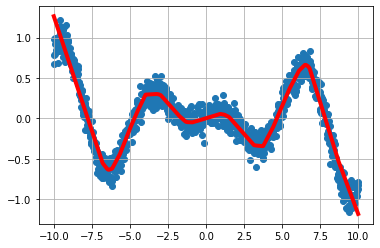

In [302]:
# Compute the output 
y_predicted = model.predict(x_data)

# Display the result
plt.scatter(x_data[::1], y_data[::1])
plt.plot(x_data, y_predicted, 'r', linewidth=4)
plt.grid()
plt.show()


# Calculer le MSE (l'erreur quadratique moyenne)

In [303]:
from sklearn.metrics import mean_squared_error

print('mse (sklearn): ', mean_squared_error(y_data, y_predicted))

mse (sklearn):  0.013800946823612183


In [304]:
loss = tf.keras.losses.mean_squared_error(y_data, y_predicted)
print(loss)

tf.Tensor(
[1.8032309  1.774598   1.7462242  1.7181079  1.6902512  1.6626521
 1.6353141  1.6082302  1.5814091  1.554844   1.5285388  1.5024908
 1.4767026  1.4511714  1.4258999  1.4008859  1.3761315  1.351635
 1.3273982  1.3034183  1.279698   1.2562358  1.2330326  1.210087
 1.1874009  1.1649728  1.1428034  1.1208922  1.099241   1.0778459
 1.0567118  1.0358347  1.0152166  0.9948567  0.9747559  0.95491284
 0.93532896 0.91600305 0.8969363  0.8781276  0.859577   0.841286
 0.8232526  0.8054783  0.7879622  0.77070534 0.7537059  0.7369661
 0.720484   0.70426124 0.6882963  0.6725911  0.65714234 0.64195406
 0.62702364 0.61235166 0.5979379  0.583783   0.56988645 0.55624866
 0.542869   0.5297487  0.5168859  0.5042826  0.4919369  0.4798504
 0.46802205 0.45645258 0.4451413  0.43408886 0.42329454 0.4127591
 0.402482   0.3924641  0.38270366 0.3732029  0.3639598  0.35497558
 0.3462496  0.33778247 0.32957348 0.3216233  0.3139317  0.3064984
 0.29932398 0.29240766 0.28575024 0.2793511  0.2732108  0.267328

# 1. Modifier le nombre de layer cachée et de nombre d'unit sur les layers : qu'observer vous au niveaux des performances (utiliser la MSE)

## diminuer le nombre de layer

In [305]:
# Create the model 
model = keras.Sequential()
model.add(keras.layers.Dense(units = 1, activation = 'linear', input_shape=[1]))
#model.add(keras.layers.Dense(units = 64, activation = 'relu'))
model.add(keras.layers.Dense(units = 64, activation = 'relu'))
model.add(keras.layers.Dense(units = 1, activation = 'linear'))
model.compile(loss='mse', optimizer="adam")

# Display the model
model.summary()

Model: "sequential_288"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1133 (Dense)           (None, 1)                 2         
_________________________________________________________________
dense_1134 (Dense)           (None, 64)                128       
_________________________________________________________________
dense_1135 (Dense)           (None, 1)                 65        
Total params: 195
Trainable params: 195
Non-trainable params: 0
_________________________________________________________________


In [306]:
# Training
model.fit( x_data, y_data, epochs=100, verbose=0)

In [307]:
# Compute the output 
y_predicted0 = model.predict(x_data)

In [308]:
print('mse (sklearn): ', mean_squared_error(y_data, y_predicted0))

mse (sklearn):  0.05556849479238289


In [309]:

def compared_mse(unit1, unit2,unit3,unit4, loss, arg):
    
    model = keras.Sequential()
    model.add(keras.layers.Dense(units = unit1, activation = 'linear', input_shape=[1]))
    model.add(keras.layers.Dense(units = unit2, activation = 'relu'))
    model.add(keras.layers.Dense(units = unit3, activation = 'relu'))
    model.add(keras.layers.Dense(units = unit4, activation = 'linear'))
    model.compile(loss=loss, optimizer= arg)
    
    # Training
    model.fit( x_data, y_data, epochs=100, verbose=0)
    # Compute the output 
    y_predicted = model.predict(x_data)
    # Compute MSE
    MSE = mean_squared_error(y_data, y_predicted)
    
    return 'MSE = {}'.format(MSE)

In [310]:
compared_mse(unit1=1, unit2=16,unit3=16,unit4=1, arg="rmsprop", loss='mse')

'MSE = 0.03716621894422831'

In [311]:
compared_mse(unit1=1, unit2=32,unit3=32,unit4=1, arg="adam", loss='mse')

'MSE = 0.014156195119078476'

In [312]:
compared_mse(unit1=1, unit2=32,unit3=32,unit4=1, arg="rmsprop", loss='mse')

'MSE = 0.017290363507001288'

In [313]:
compared_mse(unit1=1, unit2=8,unit3=8,unit4=1, arg="rmsprop", loss='mse')

'MSE = 0.051563209187774676'

# 2. Trouver un moyen d'afficher la convergences du modéles aux cours des itérations (afficher le dans un graphique).

In [314]:
def convergence():
    for i in range(10, 100, 2):
        # Create the model 
        model = keras.Sequential()
        model.add(keras.layers.Dense(units = 1, activation = 'linear', input_shape=[1]))
        model.add(keras.layers.Dense(units = 64, activation = 'relu'))
        model.add(keras.layers.Dense(units = 64, activation = 'relu'))
        model.add(keras.layers.Dense(units = 1, activation = 'linear'))
        model.compile(loss='mse', optimizer="adam")
        # Training
        history = model.fit( x_data, y_data, epochs=i, verbose=0)
        # Compute the output 
        #y_predicted = history.predict(x_data)
        
        #creat plot
    plt.plot(history.history['loss'])
    return plt.show()

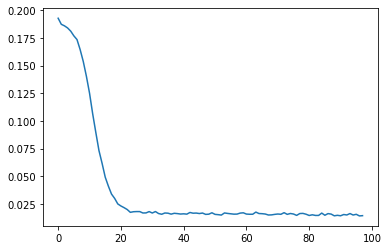

In [315]:
convergence()

# 3.  Modifier le modéle pour pouvoir apprendr le modéle sur des données en deux dimensions (un plan) (afficher ce plan et la version apprise du modéle.)

In [316]:
print(x_data.shape)
print(y_data.shape)
x_data_2D = np.array([x_data]).T
y_data_2D = np.array([y_data]).T
print(x_data_2D.shape)
print(y_data_2D.shape)

(1000,)
(1000,)
(1000, 1)
(1000, 1)


# units = 1

In [317]:
model1 = keras.Sequential()
model1.add(keras.layers.Dense(units = 1, activation = 'linear', input_shape=[1]))
model1.add(keras.layers.Dense(units = 64, activation = 'relu'))
model1.add(keras.layers.Dense(units = 64, activation = 'relu'))
model1.add(keras.layers.Dense(units = 1, activation = 'linear'))
model1.compile(loss='mse', optimizer="adam")
# Training
model1.fit(x_data_2D, y_data_2D, epochs=100, verbose=0)
# Compute the output 
y_predicted1 = model1.predict(x_data_2D)

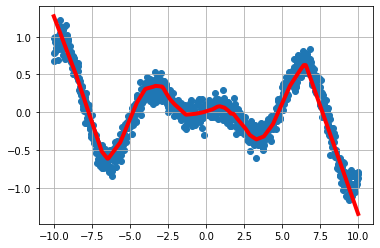

In [318]:
# Display the result
plt.scatter(x_data_2D[::1], y_data_2D[::1])
plt.plot(x_data_2D, y_predicted1, 'r', linewidth=4)
plt.grid()
plt.show()

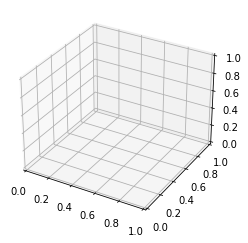

In [319]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

fig = plt.figure()
ax = fig.gca(projection='3d')

In [320]:
print(x_data_2D.shape)
print(y_predicted.shape)
#z = y_predicted.reshape(1,-1)
X, Y = np.meshgrid(x_data_2D, y_data_2D)
R = np.sqrt(X**2 + Y**2)
z= np.sin(R)
#z = (np.sin(x_data_2D) + np.cos(y_data_2D))
print(z.shape)

(1000, 1)
(1000, 1)
(1000, 1000)


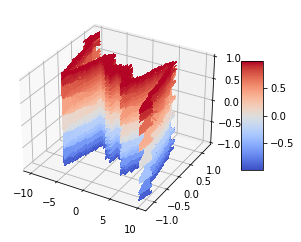

In [321]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Plot the surface.
surf = ax.plot_surface(x_data_2D, y_data_2D, z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

# units = 2 + input_dim=2

In [322]:
model1 = keras.Sequential()
model1.add(keras.layers.Dense(units = 2,input_dim=2, activation = 'linear', input_shape=[1]))
model1.add(keras.layers.Dense(units = 64, activation = 'relu'))
model1.add(keras.layers.Dense(units = 64, activation = 'relu'))
model1.add(keras.layers.Dense(units = 1, activation = 'linear'))
model1.compile(loss='mse', optimizer="adam")
# Training
model1.fit(x_data_2D, y_data_2D, epochs=100, verbose=0)
# Compute the output 
y_predicted1 = model1.predict(x_data_2D)

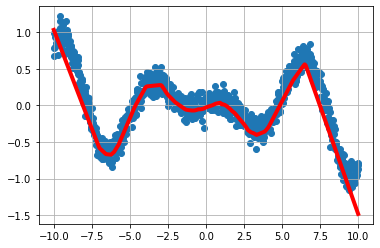

In [323]:
# Display the result
plt.scatter(x_data_2D[::1], y_data_2D[::1])
plt.plot(x_data_2D, y_predicted1, 'r', linewidth=4)
plt.grid()
plt.show()

In [324]:
X, Y = np.meshgrid(x_data_2D, y_data_2D)
R = np.sqrt(X**2 + Y**2)
z = np.sin(R)
#z = (np.sin(x_data_2D) + np.cos(y_data_2D))
print(z.shape)

(1000, 1000)


<Figure size 432x288 with 0 Axes>

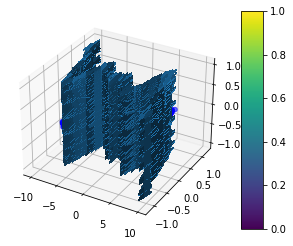

In [325]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

fig = plt.figure()
#ax = fig.gca(projection='3d')
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Plot the surface.
surf = ax.plot_surface(x_data_2D, y_data_2D, z, #cmap=cm.coolwarm,
                 linewidth=0, antialiased=False)


ax.scatter(x_data_2D, y_data_2D, c= "blue", label='points in (x,z)')
# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=1, aspect=10)

plt.show()

In [326]:
def draw3Dim (x, y, z):
    model3 = keras.Sequential()
    model3.add(keras.layers.Dense(units = 2,input_dim=2, activation = 'linear', input_shape=[1]))
    model3.add(keras.layers.Dense(units = 64, activation = 'relu'))
    model3.add(keras.layers.Dense(units = 64, activation = 'relu'))
    model3.add(keras.layers.Dense(units = 1, activation = 'linear'))
    model3.compile(loss='mse', optimizer="adam")
    # Training
    model1.fit(x, y, epochs=100, verbose=0)
    # Compute the output 
    y_predict = model1.predict(x)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x, y, y_predict, c="r")
    ax.scatter(x,y, z, marker='o')

    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    plt.title("Représentation du dataset réduit en 3 dimensions ")

    plt.show()

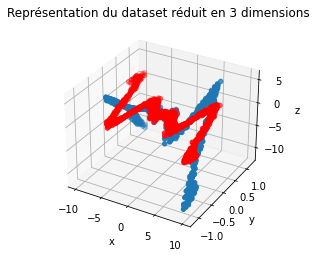

In [327]:

draw3Dim (x = x_data_2D, y = y_data_2D, z = (x_data_2D*y_data_2D))

In [328]:
# Create noisy data 3 dimensions
x_data1 = np.linspace(-10, 10, num=1000)
x_data2 = np.linspace(-10, 10, num=1000)

x= np.array((x_data1,x_data2)).T

z_data = 0.1*(x_data1+x_data2)*np.cos(x_data1+x_data2) + 0.1*np.random.normal(size=1000)


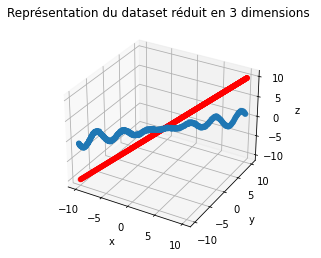

In [329]:
draw3Dim (x = x_data1, y = x_data2, z = z_data)

In [330]:
model2 = keras.Sequential()
model2.add(keras.layers.Dense(units = 1, activation = 'linear', input_shape=[1]))
model2.add(keras.layers.Dense(units = 64, activation = 'relu'))
model2.add(keras.layers.Dense(units = 64, activation = 'relu'))
model2.add(keras.layers.Dense(units = 1, activation = 'linear'))
model2.compile(loss='mse', optimizer="adam")
# Training
model2.fit(x_data1, x_data2, epochs=20, verbose=0)
# Compute the output 
y_predicted2 = model2.predict(x_data1)

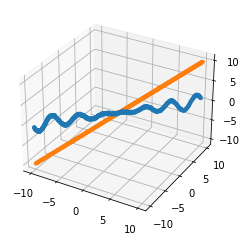

In [331]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_data1, x_data2, z_data, marker='o', s=10)
ax.scatter(x_data1, x_data2, y_predicted2, marker='o', s=10)
plt.show()

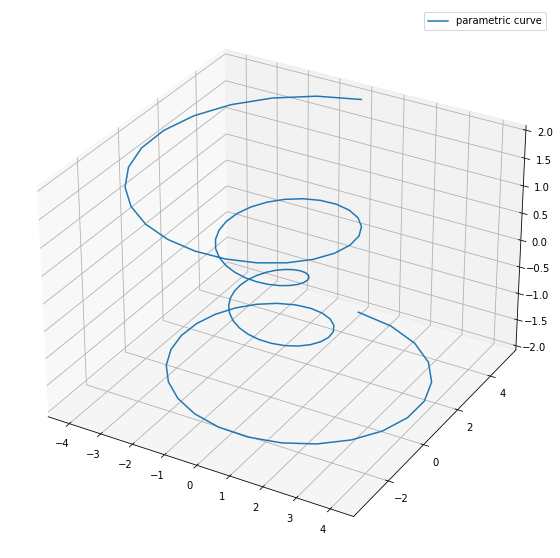

In [350]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

mpl.rcParams['legend.fontsize'] = 10

fig = plt.figure(figsize=(15,10))
ax = fig.gca(projection='3d')
theta = np.linspace(-4 * np.pi, 4 * np.pi, 100)
z = np.linspace(-2, 2, 100)
r = z**2 + 1
x = r * np.sin(theta)
y = r * np.cos(theta)
ax.plot(x, y, z, label='parametric curve')
ax.legend()

plt.show()

In [351]:
model4 = keras.Sequential()
model4.add(keras.layers.Dense(units = 1, activation = 'linear', input_shape=[1]))
model4.add(keras.layers.Dense(units = 64, activation = 'relu'))
model4.add(keras.layers.Dense(units = 64, activation = 'relu'))
model4.add(keras.layers.Dense(units = 1, activation = 'linear'))
model4.compile(loss='mse', optimizer="adam")
# Training
model4.fit(x, y, epochs=20, verbose=0)
# Compute the output 
y_predicted4 = model4.predict(x)
print(x.shape)
print(y.shape)
print(y_predicted4.shape)

(100,)
(100,)
(100, 1)
